In [0]:
import torch 
import torch.nn as nn 
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
import torch.optim as optim

In [0]:
train_set = torchvision.datasets.FashionMNIST(root='./data/FashionMNIST',
                                              train=True, #we want the data for training set
                                              download=True, # download data if its not specifies in the root
                                              transform=transforms.Compose([transforms.ToTensor()])) # transform the training set into pytorch tensors

In [0]:
train_loader = torch.utils.data.DataLoader(train_set, batch_size=100)

In [360]:
len(train_set)

60000

In [361]:
train_set.train_labels

/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:43: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


tensor([9, 0, 0,  ..., 3, 0, 5])

In [362]:
train_set.train_labels.bincount()

/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:43: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


tensor([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000])

In [0]:
sample = next(iter(train_set))

In [364]:
len(sample)

2

In [365]:
type(sample)

tuple

In [0]:
image, label = sample

9

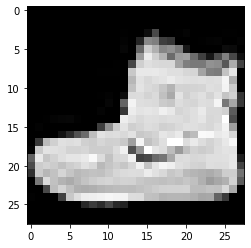

In [367]:
plt.imshow(image.squeeze(), cmap='gray')
label

In [0]:
batch = next(iter(train_loader))

In [369]:
len(batch)

2

In [370]:
type(batch)

list

In [0]:
images, labels = batch

In [372]:
images.shape

torch.Size([100, 1, 28, 28])

In [373]:
labels.shape

torch.Size([100])

tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9, 1, 0, 6, 4, 3, 1, 4, 8,
        4, 3, 0, 2, 4, 4, 5, 3, 6, 6, 0, 8, 5, 2, 1, 6, 6, 7, 9, 5, 9, 2, 7, 3,
        0, 3, 3, 3, 7, 2, 2, 6, 6, 8, 3, 3, 5, 0, 5, 5, 0, 2, 0, 0, 4, 1, 3, 1,
        6, 3, 1, 4, 4, 6, 1, 9, 1, 3, 5, 7, 9, 7, 1, 7, 9, 9, 9, 3, 2, 9, 3, 6,
        4, 1, 1, 8])

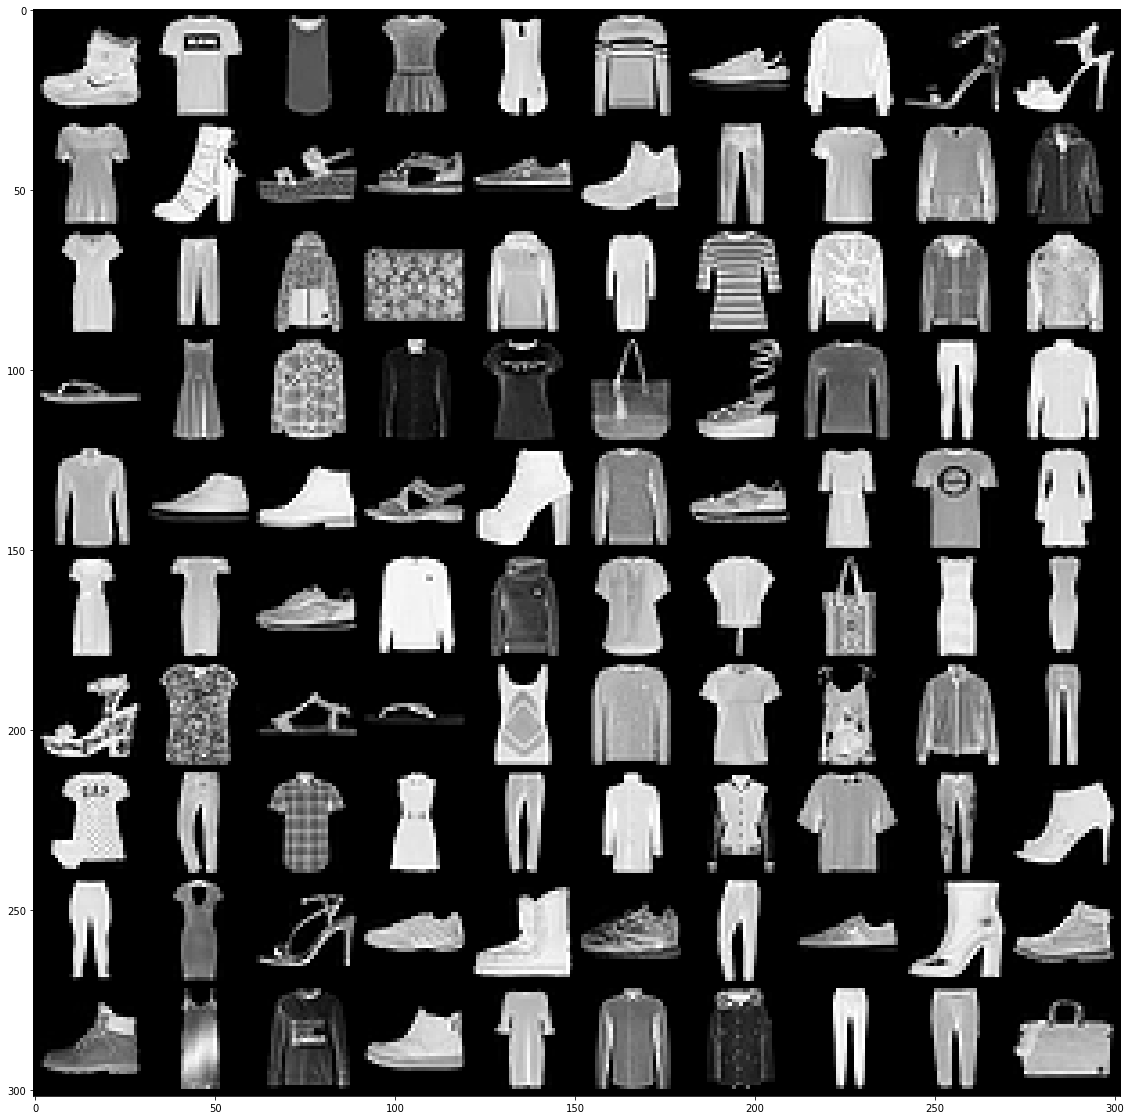

In [374]:
grid = torchvision.utils.make_grid(images, nrow=10)
plt.figure(figsize=(20,20))
plt.imshow(np.transpose(grid, (1,2,0)))
labels

pytorch's nn library gives us the tools to construct layers of an NN. Each layer has tranformation and weights.

  Here according to OOPS- a transformation will be a method(code) and
                                weights will be attributes(data)

 The class Module is the base class for all NN modules. So, all the layers and NN(a bunch of layers) inherit the features of 'Module' class

In [0]:
class Network(nn.Module):
  def __init__(self):
    super(Network, self).__init__()
    self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
    self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)

    self.fc1 = nn.Linear(in_features=12*4*4, out_features=120)
    self.fc2 = nn.Linear(in_features=120, out_features=60)
    self.out = nn.Linear(in_features=60, out_features=10)

  def forward(self, t):
    # (1) Input layer
    t=t

    # (2) Hidden conv layer
    t=self.conv1(t)
    t=F.relu(t)
    t=F.max_pool2d(t, kernel_size=2, stride=2)

    # (3) Hidden conv layer
    t=self.conv2(t)
    t=F.relu(t)
    t=F.max_pool2d(t, kernel_size=2, stride=2)

    # (4) Hidden Linear layer
    t=t.reshape(-1, 12*4*4)
    t=self.fc1(t)
    t=F.relu(t)

    # (5) Hidden Linear layer
    t=self.fc2(t)
    t=F.relu(t)

    # (6) Output layer
    t=self.out(t)
    
    return t

In [0]:
network = Network()

In [377]:
for name, param in network.named_parameters():
  print(name, '\t\t', param.shape)

conv1.weight 		 torch.Size([6, 1, 5, 5])
conv1.bias 		 torch.Size([6])
conv2.weight 		 torch.Size([12, 6, 5, 5])
conv2.bias 		 torch.Size([12])
fc1.weight 		 torch.Size([120, 192])
fc1.bias 		 torch.Size([120])
fc2.weight 		 torch.Size([60, 120])
fc2.bias 		 torch.Size([60])
out.weight 		 torch.Size([10, 60])
out.bias 		 torch.Size([10])


In [378]:
torch.set_grad_enabled(True)

In [379]:
image.shape

torch.Size([1, 28, 28])

In [380]:
image.unsqueeze(0).shape

torch.Size([1, 1, 28, 28])

In [0]:
pred = network(image.unsqueeze(0))

In [382]:
pred.shape

torch.Size([1, 10])

In [383]:
pred

tensor([[ 0.0600,  0.0306,  0.1291,  0.0470,  0.0291, -0.1243,  0.1202,  0.1796,
         -0.0860,  0.0468]], grad_fn=<AddmmBackward>)

In [384]:
pred.argmax(dim=1)

tensor([7])

In [385]:
F.softmax(pred, dim=1)

tensor([[0.1013, 0.0984, 0.1086, 0.1000, 0.0982, 0.0843, 0.1076, 0.1142, 0.0875,
         0.1000]], grad_fn=<SoftmaxBackward>)

In [386]:
F.softmax(pred, dim=1).argmax(dim=1)

tensor([7])

In [0]:
preds = network(images)

In [388]:
preds.shape

torch.Size([100, 10])

In [389]:
preds # Batch size = 10 with 10 prediction classes 

tensor([[ 0.0600,  0.0306,  0.1291,  0.0470,  0.0291, -0.1243,  0.1202,  0.1796,
         -0.0860,  0.0468],
        [ 0.0707,  0.0228,  0.1288,  0.0576,  0.0249, -0.1251,  0.1277,  0.1835,
         -0.0789,  0.0409],
        [ 0.0570,  0.0372,  0.1151,  0.0649,  0.0347, -0.1028,  0.1150,  0.1704,
         -0.0800,  0.0462],
        [ 0.0602,  0.0313,  0.1222,  0.0642,  0.0276, -0.1113,  0.1189,  0.1764,
         -0.0823,  0.0479],
        [ 0.0647,  0.0188,  0.1275,  0.0614,  0.0235, -0.1204,  0.1226,  0.1832,
         -0.0860,  0.0479],
        [ 0.0643,  0.0278,  0.1325,  0.0596,  0.0227, -0.1248,  0.1285,  0.1824,
         -0.0809,  0.0454],
        [ 0.0653,  0.0374,  0.1219,  0.0549,  0.0254, -0.1084,  0.1255,  0.1734,
         -0.0877,  0.0535],
        [ 0.0608,  0.0262,  0.1373,  0.0561,  0.0240, -0.1328,  0.1283,  0.1867,
         -0.0743,  0.0427],
        [ 0.0502,  0.0429,  0.1155,  0.0624,  0.0404, -0.1072,  0.1108,  0.1632,
         -0.0836,  0.0486],
        [ 0.0466,  

In [390]:
preds.argmax(dim=1)

tensor([7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
        7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
        7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
        7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
        7, 7, 7, 7])

In [391]:
labels

tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9, 1, 0, 6, 4, 3, 1, 4, 8,
        4, 3, 0, 2, 4, 4, 5, 3, 6, 6, 0, 8, 5, 2, 1, 6, 6, 7, 9, 5, 9, 2, 7, 3,
        0, 3, 3, 3, 7, 2, 2, 6, 6, 8, 3, 3, 5, 0, 5, 5, 0, 2, 0, 0, 4, 1, 3, 1,
        6, 3, 1, 4, 4, 6, 1, 9, 1, 3, 5, 7, 9, 7, 1, 7, 9, 9, 9, 3, 2, 9, 3, 6,
        4, 1, 1, 8])

In [392]:
preds.argmax(dim=1).eq(labels).sum()

tensor(8)

In [0]:
def get_num_correct(preds, labels):
  return preds.argmax(dim=1).eq(labels).sum().item()

In [394]:
get_num_correct(preds, labels)

8

In [395]:
loss = F.cross_entropy(preds, labels)
loss.item()

2.30240535736084

In [396]:
print(network.conv1.weight.grad) # Because we havent back propagated yet. The gradients will be generated once we backpropagate.

None


In [0]:
loss.backward() # Calculating the gradients

In [398]:
network.conv1.weight.grad.shape

torch.Size([6, 1, 5, 5])

In [399]:
network.conv1.weight.shape

torch.Size([6, 1, 5, 5])

In [400]:
network.conv2.weight.grad.shape

torch.Size([12, 6, 5, 5])

In [401]:
network.conv2.weight.shape

torch.Size([12, 6, 5, 5])

The shape of the gradient tensor of a layer is same as that of weights tensor of that particular layer. To adjust every single weight value we need a unique gradient for each weight.  

In [0]:
optimizer = optim.Adam(network.parameters(), lr=0.01) # Creating an optimizer 

In [403]:
loss.item()

2.30240535736084

In [0]:
optimizer.step() # Updating the weights

In [0]:
preds = network(images)
loss = F.cross_entropy(preds, labels)

In [406]:
loss.item()

2.2829368114471436

The loss value got reduced from 2.321 to 2.304. This because the weights got modified.

In [407]:
get_num_correct(preds, labels)

15

Number of correct predictions increased from 8 to 15